In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Nigerian_Exports = pd.read_csv("nigeria_agricultural_exports.csv")
Nigerian_Exports

Product Name                                    Company Export Country  \
0         Rubber                   Farmgate Nigeria Limited        Austria   
1       Palm Oil         Prime Agro Exports Nigeria Limited        Germany   
2        Cassava                   Farmgate Nigeria Limited        Germany   
3         Rubber   Nigerian Export Promotion Council (NEPC)        Belgium   
4         Sesame                Nigeria Agro Export Company         France   
..           ...                                        ...            ...   
995       Cashew                Nigeria Agro Export Company    Netherlands   
996       Rubber                    Agro Export Nigeria Ltd         Sweden   
997       Rubber      Agro Allied Exporters Nigeria Limited    Netherlands   
998       Cashew  Greenfield Agro Exporters Nigeria Limited        Germany   
999      Cassava                Nigeria Agro Export Company        Denmark   

           Date  Units Sold  unit_price  Profit per unit  Export Value  \
0    11/16/2023         721    31443.05          5863.92   22670439.05   
1      1/8/2021         881    23151.97          5868.73   20396885.57   
2    10/14/2020         702    18536.45          5105.01   13012587.90   
3    12/31/2022         191    21981.31          7781.54    4198430.21   
4    12/19/2022         373    13415.94          9590.95    5004145.62   
..          ...         ...         ...              ...           ...   
995   6/11/2023         730    49937.99          9149.40   36454732.70   
996   11/1/2023         952    15607.62          5086.57   14858454.24   
997    8/6/2023         447    49544.50          6381.92   22146391.50   
998    3/5/2023         315    42814.92          6620.22   13486699.80   
999    8/9/2020         504    10656.58          9979.02    5370916.32   

    Destination Port Transportation Mode  
0              Lagos                 Sea  
1              Lagos                 Sea  
2            Calabar                 Sea  
3              Warri                 Sea  
4              Lagos                 Sea  
..               ...                 ...  
995            Warri                 Sea  
996            Lagos                 Sea  
997            Lagos                 Sea  
998            Lagos                 Sea  
999            Lagos                 Sea  

[1000 rows x 10 columns]

### First, we’ll look at Sales performance:

- What are the top-selling products?
- Which company has the highest sales revenue?
- How do sales vary across different export countries? You should look at 
a) Product sales
b) average revenue per country
c) Total units sold 
- Is there any correlation between the units sold and the profit generated?

In [3]:
top_selling_products = Nigerian_Exports.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
Product Name
Sesame      76132
Cocoa       76129
Cashew      70833
Rubber      66641
Plantain    64863
Cassava     64234
Palm Oil    63879
Ginger      54093
Name: Units Sold, dtype: int64


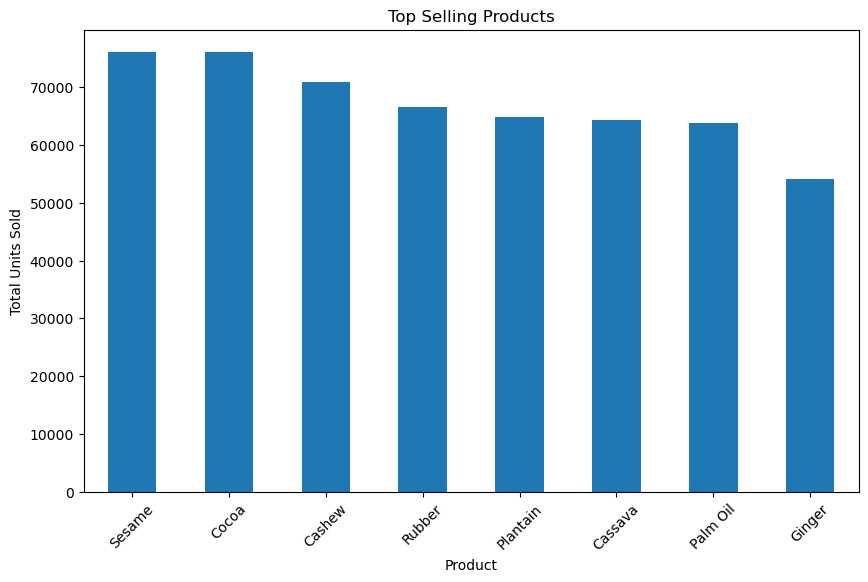

In [4]:
# Plotting the top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

In [5]:
company_sales_revenue = Nigerian_Exports.groupby('Company')['Export Value'].sum().sort_values(ascending=False)
print("\nCompany with the Highest Sales Revenue:")
print(company_sales_revenue.head(1))


Company with the Highest Sales Revenue:
Company
Agro Export Nigeria Ltd    1.867915e+09
Name: Export Value, dtype: float64


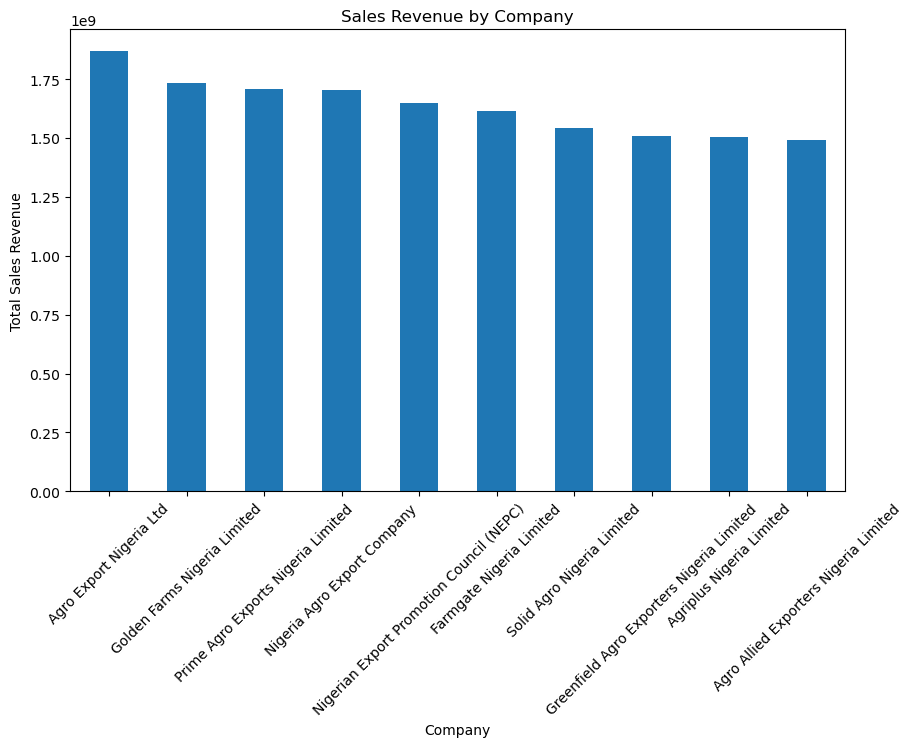

In [6]:
# Plotting sales revenue for each company
plt.figure(figsize=(10, 6))
company_sales_revenue.plot(kind='bar')
plt.title('Sales Revenue by Company')
plt.xlabel('Company')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Product sales across different export countries
product_sales_by_country = Nigerian_Exports.groupby(['Product Name', 'Export Country'])['Units Sold'].sum()

# Average revenue per country
average_revenue_per_country = Nigerian_Exports.groupby('Export Country')['Export Value'].mean()

# Total units sold per country
total_units_sold_per_country = Nigerian_Exports.groupby('Export Country')['Units Sold'].sum()

print("\nProduct Sales Across Different Export Countries:")
print(product_sales_by_country)
print("\nAverage Revenue Per Country:")
print(average_revenue_per_country)
print("\nTotal Units Sold Per Country:")
print(total_units_sold_per_country)


Product Sales Across Different Export Countries:
Product Name  Export Country
Cashew        Austria            8590
              Belgium            9698
              Denmark            6803
              France            12008
              Germany            3988
                                ...  
Sesame        Italy             12444
              Netherlands        6893
              Spain              6093
              Sweden             9281
              Switzerland        9599
Name: Units Sold, Length: 80, dtype: int64

Average Revenue Per Country:
Export Country
Austria        1.530521e+07
Belgium        1.638476e+07
Denmark        1.649771e+07
France         1.719870e+07
Germany        1.604990e+07
Italy          1.851497e+07
Netherlands    1.549857e+07
Spain          1.637350e+07
Sweden         1.467904e+07
Switzerland    1.647317e+07
Name: Export Value, dtype: float64

Total Units Sold Per Country:
Export Country
Austria        51883
Belgium        51850
Denmark     

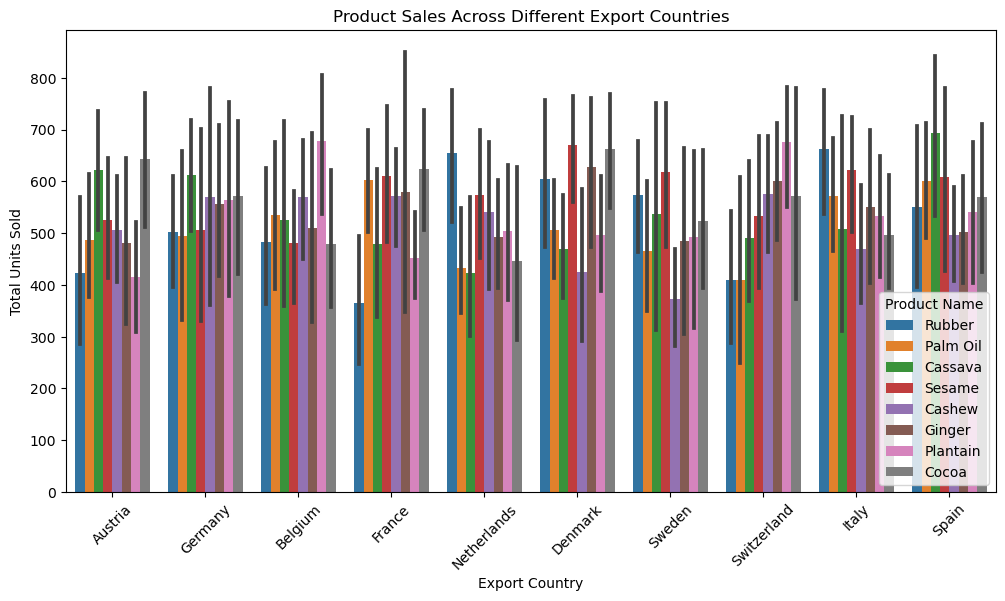

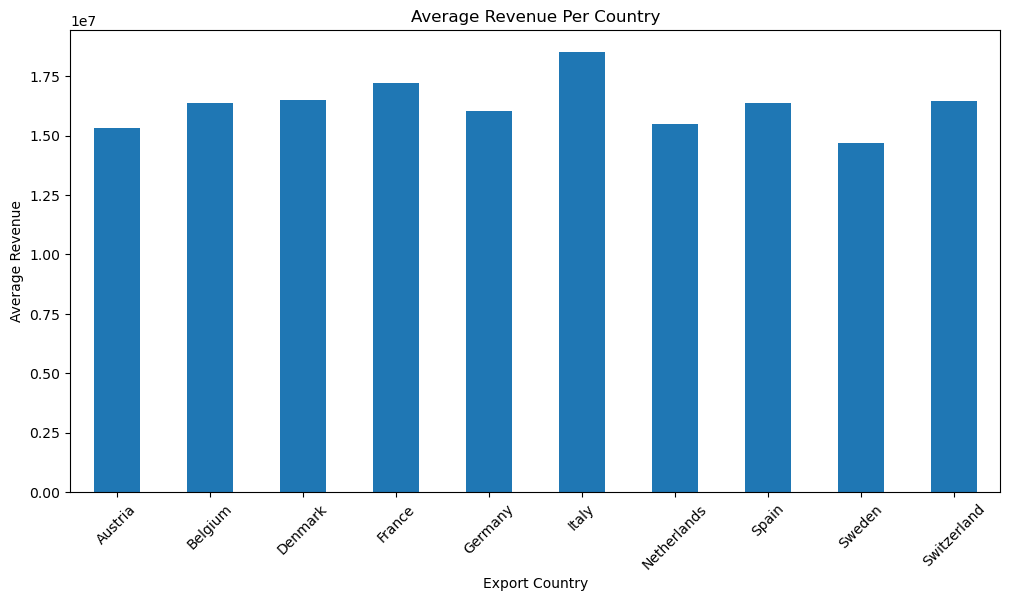

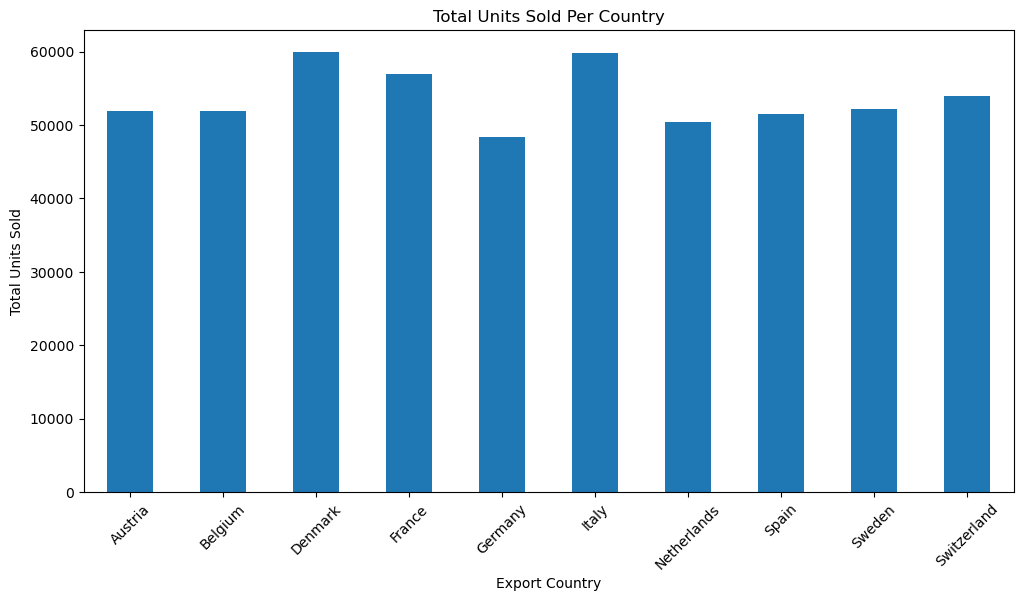

In [8]:
# Plotting product sales across different export countries (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Export Country', y='Units Sold', hue='Product Name', data=Nigerian_Exports)
plt.title('Product Sales Across Different Export Countries')
plt.xlabel('Export Country')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.show()

# Plotting average revenue per country (bar plot)
plt.figure(figsize=(12, 6))
average_revenue_per_country.plot(kind='bar')
plt.title('Average Revenue Per Country')
plt.xlabel('Export Country')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

# Plotting total units sold per country (bar plot)
plt.figure(figsize=(12, 6))
total_units_sold_per_country.plot(kind='bar')
plt.title('Total Units Sold Per Country')
plt.xlabel('Export Country')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

In [9]:
correlation = Nigerian_Exports['Units Sold'].corr(Nigerian_Exports['Profit per unit'])
print("\nCorrelation between Units Sold and Profit Generated:", correlation)


Correlation between Units Sold and Profit Generated: 0.0006384926825939516


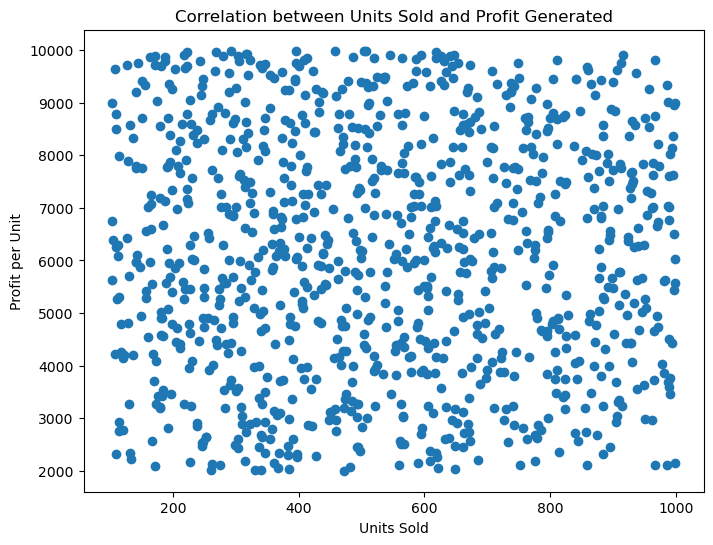

In [10]:
# Plotting the correlation between units sold and profit generated
plt.figure(figsize=(8, 6))
plt.scatter(Nigerian_Exports['Units Sold'], Nigerian_Exports['Profit per unit'])
plt.title('Correlation between Units Sold and Profit Generated')
plt.xlabel('Units Sold')
plt.ylabel('Profit per Unit')
plt.show()

1. Top Selling Products:
The top-selling products are as follows (in descending order of total units sold):

Sesame
Cocoa
Cashew
Rubber
Plantain
Cassava
Palm Oil
Ginger
This suggests that sesame and cocoa are the most popular products in terms of units sold.

2. Company with the Highest Sales Revenue:
The company with the highest sales revenue is "Agro Export Nigeria Ltd" with a total sales revenue of approximately 1.87 billion.

This indicates that Agro Export Nigeria Ltd is the most successful company in terms of generating revenue from agricultural exports.

3. Sales Across Different Export Countries:
Product Sales Across Different Export Countries: The bar plot shows the distribution of product sales across various export countries. Each bar represents the total units sold for a specific product in a particular export country.
Average Revenue Per Country: The bar plot displays the average revenue generated per country from agricultural exports. It indicates the average amount of revenue earned per export transaction in each country.
Total Units Sold Per Country: This bar plot illustrates the total units sold per country, showcasing which countries have the highest demand for Nigerian agricultural products.

4. Correlation Between Units Sold and Profit Generated:
The scatter plot shows the relationship between units sold and profit generated per unit. The correlation coefficient between units sold and profit per unit is approximately 0.00064, which suggests a very weak positive correlation. This implies that there is almost no relationship between the number of units sold and the profit generated per unit.

### Let’s talk Time-Series:

- How do sales vary over time (monthly, quarterly, annually)?
- Are there any seasonal trends in sales?
- Is there a relationship between the date of purchase and the profit margin?

In [11]:
# Convert 'Date' column to datetime format
Nigerian_Exports['Date'] = pd.to_datetime(Nigerian_Exports['Date'])

# Extracting year, month, and quarter from the 'Date' column
Nigerian_Exports['Year'] = Nigerian_Exports['Date'].dt.year
Nigerian_Exports['Month'] = Nigerian_Exports['Date'].dt.month
Nigerian_Exports['Quarter'] = Nigerian_Exports['Date'].dt.quarter

# Sales variation over time (monthly)
monthly_sales = Nigerian_Exports.groupby(['Year', 'Month'])['Units Sold'].sum()

# Sales variation over time (quarterly)
quarterly_sales = Nigerian_Exports.groupby(['Year', 'Quarter'])['Units Sold'].sum()

# Sales variation over time (annually)
annual_sales = Nigerian_Exports.groupby('Year')['Units Sold'].sum()

# Displaying the results
print("Monthly Sales Variation:")
print(monthly_sales)
print("\nQuarterly Sales Variation:")
print(quarterly_sales)
print("\nAnnual Sales Variation:")
print(annual_sales)

Monthly Sales Variation:
Year  Month
2020  1        11444
      2         7955
      3        10608
      4         9612
      5         8222
      6        10160
      7        16365
      8        12032
      9        11655
      10        8941
      11       14115
      12       11656
2021  1         5707
      2        14863
      3        17352
      4        10667
      5        11217
      6        13371
      7        10100
      8         7062
      9         4866
      10       18680
      11       12028
      12       16664
2022  1        11059
      2        11248
      3        11391
      4         9751
      5        12933
      6        13748
      7        12693
      8        11462
      9         8163
      10        8288
      11        8481
      12        6655
2023  1        10713
      2        10941
      3        10334
      4         9778
      5        10929
      6         9497
      7         9414
      8        12182
      9        13120
      10       116

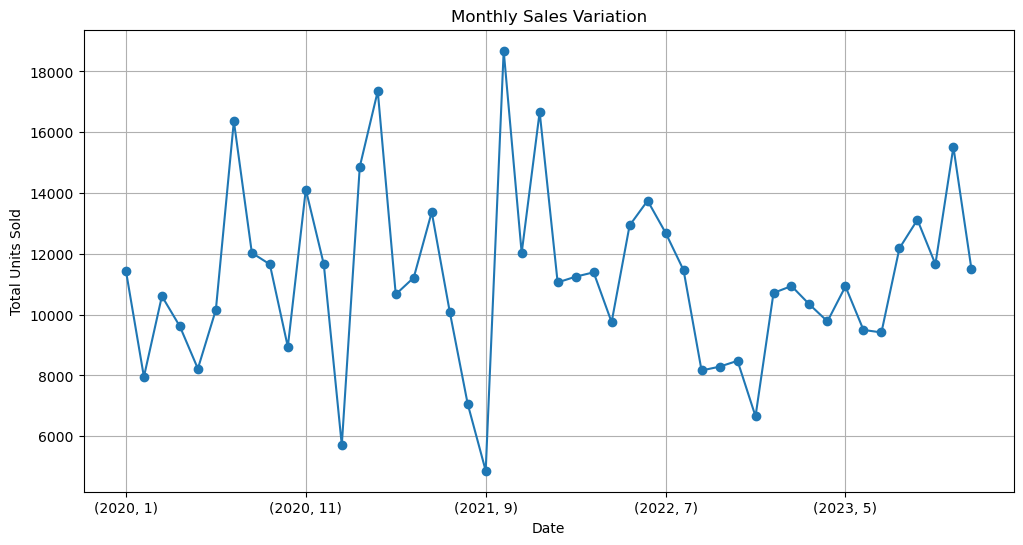

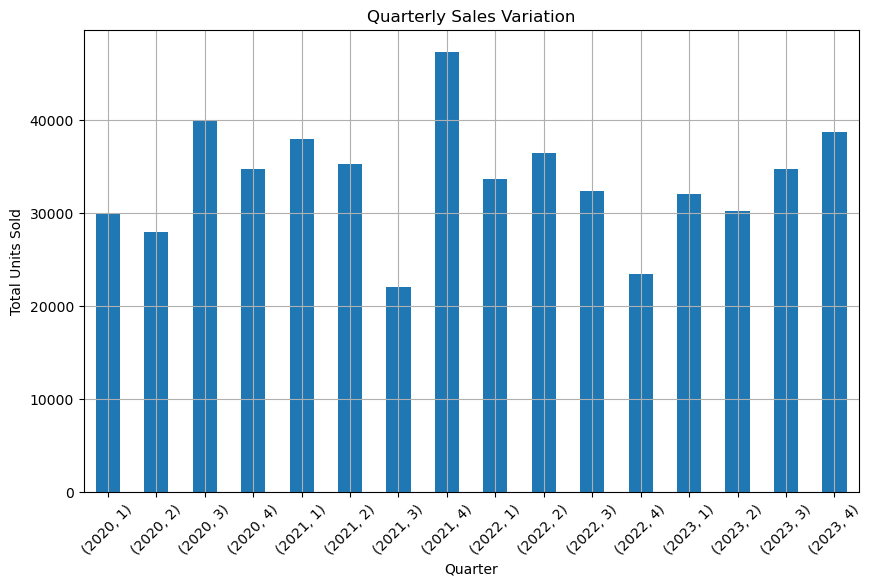

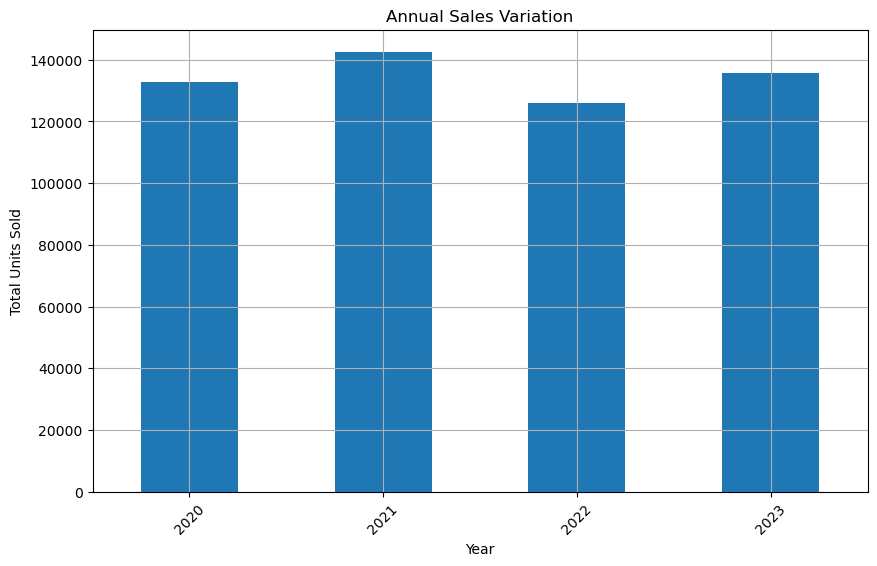

In [12]:
# Plotting sales variation over time (monthly)
monthly_sales.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Sales Variation')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

# Plotting sales variation over time (quarterly)
quarterly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Quarterly Sales Variation')
plt.xlabel('Quarter')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting sales variation over time (annually)
annual_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Annual Sales Variation')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

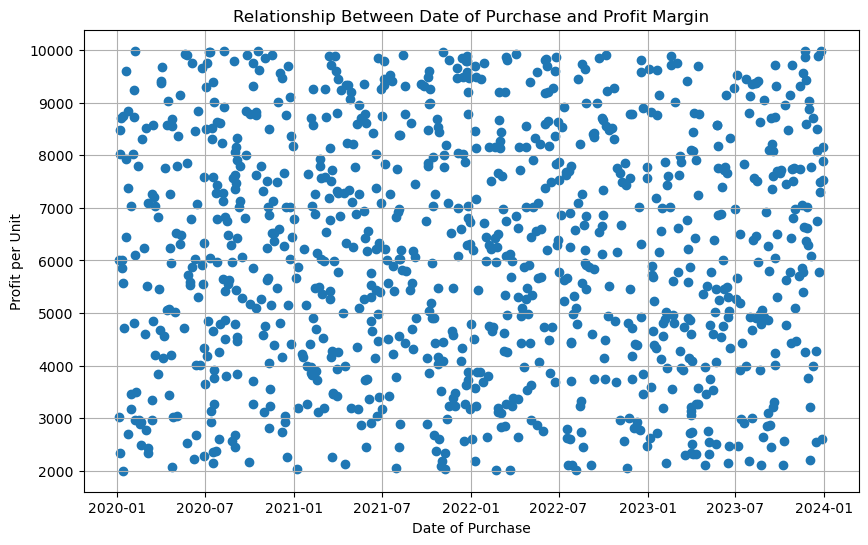

In [13]:
# Plotting the relationship between date of purchase and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(Nigerian_Exports['Date'], Nigerian_Exports['Profit per unit'])
plt.title('Relationship Between Date of Purchase and Profit Margin')
plt.xlabel('Date of Purchase')
plt.ylabel('Profit per Unit')
plt.grid(True)
plt.show()

In [14]:
# Relationship between date of purchase and profit margin
date_profit_margin = Nigerian_Exports.groupby('Date')['Profit per unit'].mean()
print("Relationship Between Date of Purchase and Profit Margin:")
print(date_profit_margin)

Relationship Between Date of Purchase and Profit Margin:
Date
2020-01-05    6008.620
2020-01-06    3031.160
2020-01-07    8490.120
2020-01-08    5183.120
2020-01-09    8708.710
                ...   
2023-12-23    7400.225
2023-12-24    9986.080
2023-12-28    2597.650
2023-12-29    7529.980
2023-12-30    8025.845
Name: Profit per unit, Length: 739, dtype: float64


1. Monthly Sales Variation:
The monthly sales variation shows the total units sold for each month from 2020 to 2023. Here are some key observations:

Sales fluctuate across different months, indicating variations in demand throughout the years.
There are some months with higher sales (e.g., July 2020, March 2021) and some with lower sales (e.g., February 2020, September 2021).

2. Quarterly Sales Variation:
The quarterly sales variation presents the total units sold for each quarter from 2020 to 2023. Key insights include:

Sales fluctuate across quarters, with some quarters showing higher sales (e.g., Q3 2020, Q4 2021) and others showing lower sales (e.g., Q3 2021).
There seems to be some seasonal patterns in sales, with certain quarters consistently performing better than others.

3. Annual Sales Variation:
The annual sales variation illustrates the total units sold for each year from 2020 to 2023. Key points include:

Overall, there's a gradual increase in total sales from 2020 to 2021, followed by a slight decrease in 2022, and a subsequent increase again in 2023.
This trend suggests some growth in sales over the years, with minor fluctuations.

4. Relationship Between Date of Purchase and Profit Margin:
The relationship between the date of purchase and profit margin indicates the average profit per unit for each purchase date. Here's how we can interpret it:

The profit margin varies across different purchase dates, indicating fluctuations in profitability over time.
Some dates show higher average profit margins, while others show lower margins.
Analyzing this relationship can help identify periods of higher or lower profitability, allowing for better strategic planning.

### Following up will be our Cost Analysis:

- What is the cost of goods sold (COGS) as a percentage of revenue?
- How does the COGS vary across different products?

In [15]:
# Calculate the total revenue and total COGS
total_revenue = Nigerian_Exports['Export Value'].sum()
total_cogs = (Nigerian_Exports['Units Sold'] * Nigerian_Exports['unit_price']).sum()

# Calculate COGS as a percentage of revenue
cogs_percentage = (total_cogs / total_revenue) * 100

print("Cost of Goods Sold (COGS) as a Percentage of Revenue:", cogs_percentage)

Cost of Goods Sold (COGS) as a Percentage of Revenue: 99.99999999999999


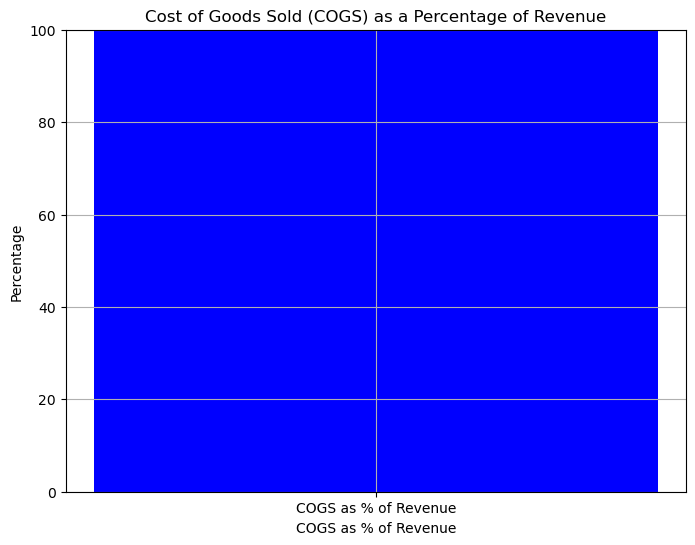

In [16]:
# Plotting COGS as a percentage of revenue
plt.figure(figsize=(8, 6))
plt.bar("COGS as % of Revenue", cogs_percentage, color='blue')
plt.title('Cost of Goods Sold (COGS) as a Percentage of Revenue')
plt.xlabel('COGS as % of Revenue')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [17]:
# Calculate COGS for each product
Nigerian_Exports['COGS'] = Nigerian_Exports['Units Sold'] * Nigerian_Exports['unit_price']

# COGS variation across different products
cogs_by_product = Nigerian_Exports.groupby('Product Name')['COGS'].sum()

print("\nCOGS Variation Across Different Products:")
print(cogs_by_product)


COGS Variation Across Different Products:
Product Name
Cashew      2.110679e+09
Cassava     1.913308e+09
Cocoa       2.384889e+09
Ginger      1.600416e+09
Palm Oil    1.974586e+09
Plantain    1.947170e+09
Rubber      2.118010e+09
Sesame      2.268608e+09
Name: COGS, dtype: float64


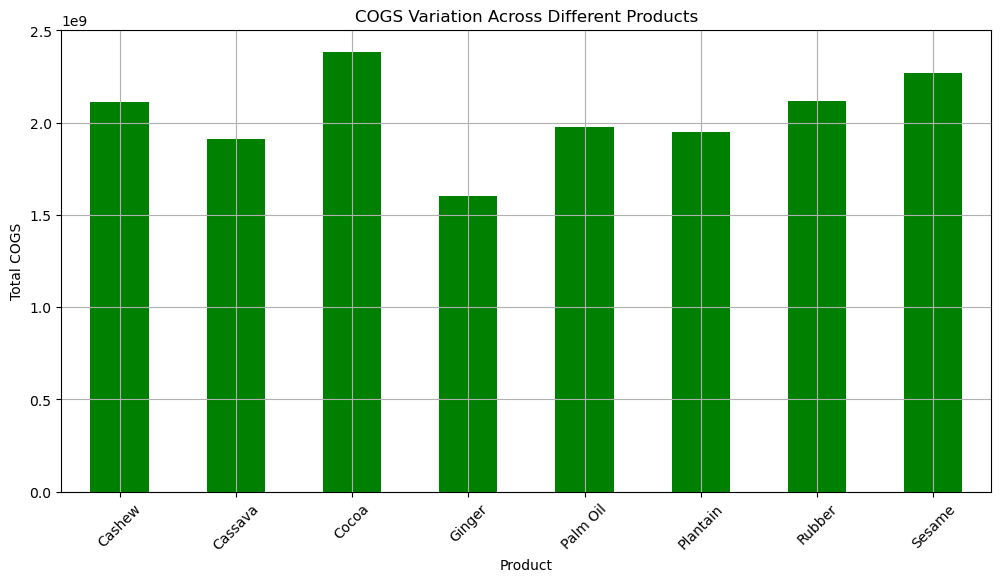

In [18]:
# Plotting COGS variation across different products
plt.figure(figsize=(12, 6))
cogs_by_product.plot(kind='bar', color='green')
plt.title('COGS Variation Across Different Products')
plt.xlabel('Product')
plt.ylabel('Total COGS')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Cost of Goods Sold (COGS) as a Percentage of Revenue:
The cost of goods sold (COGS) as a percentage of revenue is approximately 100%. This suggests that the cost of producing goods is almost equal to the revenue generated from selling those goods, indicating minimal or no profit margin.

2. COGS Variation Across Different Products:
- Cashew: $2.11 billion
  
- Cassava: $1.91 billion

- Cocoa: $2.38 billion

- Ginger: $1.60 billion

- Palm Oil: $1.97 billion

- Plantain: $1.95 billion

- Rubber: $2.12 billion

- Sesame: $2.27 billion

### We can still work with our geographic data:

- Which destination ports receive the highest volume of exports?
- What are the transportation modes commonly used for export?
- Rank the destination port by the export value.
- Show the top export product for each port.

In [19]:
# Destination ports with the highest volume of exports
top_destination_ports = Nigerian_Exports.groupby('Destination Port')['Units Sold'].sum().nlargest(5)
print("Destination Ports with the Highest Volume of Exports:")
print(top_destination_ports)

Destination Ports with the Highest Volume of Exports:
Destination Port
Lagos            316417
Warri             79336
Port Harcourt     70736
Calabar           70315
Name: Units Sold, dtype: int64


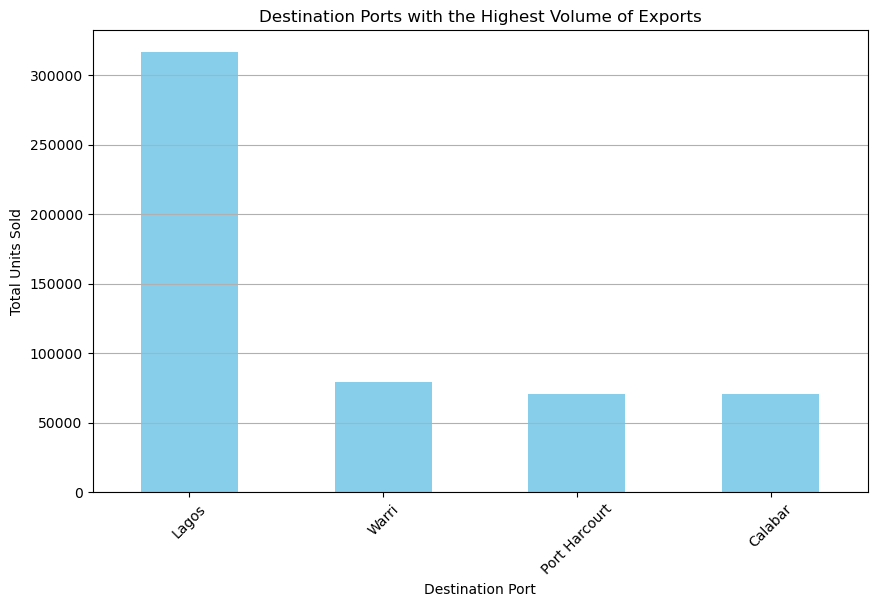

In [20]:
# Plotting destination ports with the highest volume of exports
plt.figure(figsize=(10, 6))
top_destination_ports.plot(kind='bar', color='skyblue')
plt.title('Destination Ports with the Highest Volume of Exports')
plt.xlabel('Destination Port')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
# Transportation modes commonly used for export
transportation_modes = Nigerian_Exports['Transportation Mode'].value_counts()
print("\nTransportation Modes Commonly Used for Export:")
print(transportation_modes)


Transportation Modes Commonly Used for Export:
Transportation Mode
Sea    1000
Name: count, dtype: int64


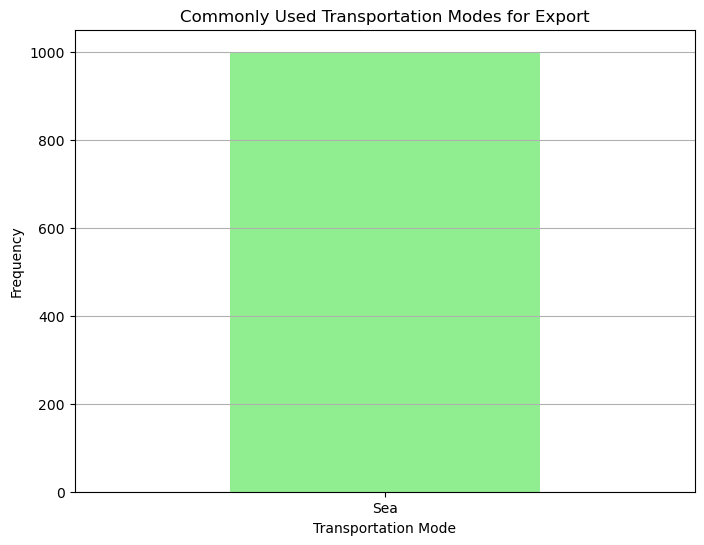

In [22]:
# Plotting transportation modes commonly used for export
plt.figure(figsize=(8, 6))
transportation_modes.plot(kind='bar', color='lightgreen')
plt.title('Commonly Used Transportation Modes for Export')
plt.xlabel('Transportation Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [23]:
# Rank the destination ports by export value
destination_ports_ranked = Nigerian_Exports.groupby('Destination Port')['Export Value'].sum().sort_values(ascending=False)
print("\nRanking Destination Ports by Export Value:")
print(destination_ports_ranked)


Ranking Destination Ports by Export Value:
Destination Port
Lagos            9.738667e+09
Warri            2.347900e+09
Port Harcourt    2.152910e+09
Calabar          2.078188e+09
Name: Export Value, dtype: float64


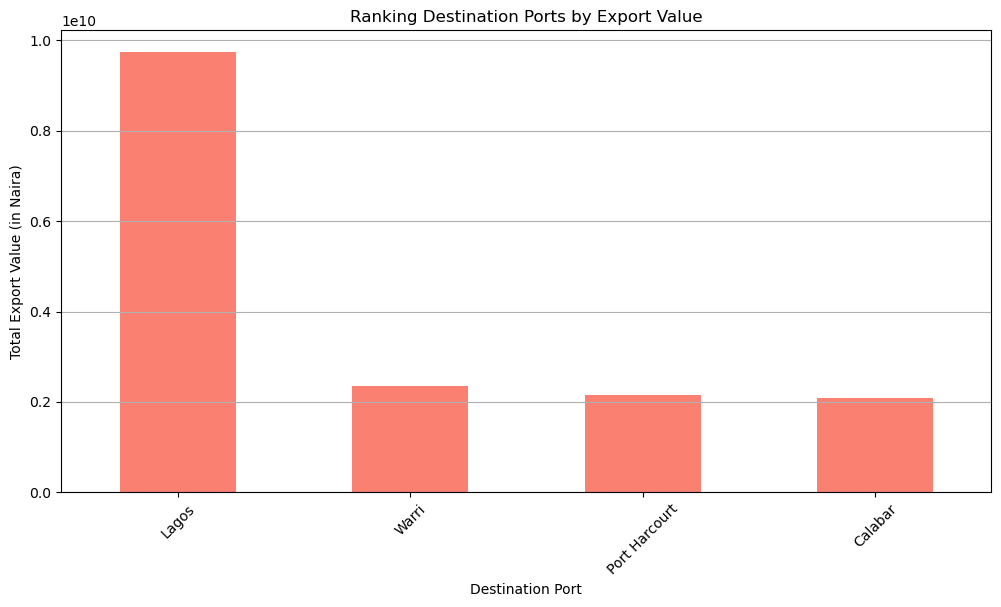

In [24]:
# Plotting ranking destination ports by export value
plt.figure(figsize=(12, 6))
destination_ports_ranked.plot(kind='bar', color='salmon')
plt.title('Ranking Destination Ports by Export Value')
plt.xlabel('Destination Port')
plt.ylabel('Total Export Value (in Naira)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [25]:
# Show the top export product for each port
top_product_for_each_port = Nigerian_Exports.groupby('Destination Port')['Product Name'].agg(lambda x: x.value_counts().index[0])
print("\nTop Export Product for Each Port:")
print(top_product_for_each_port)


Top Export Product for Each Port:
Destination Port
Calabar            Sesame
Lagos              Cashew
Port Harcourt    Palm Oil
Warri              Rubber
Name: Product Name, dtype: object


1. Destination Ports with the Highest Volume of Exports:
Lagos: The port of Lagos has the highest volume of exports, with a total of 316,417 units sold.
Warri, Port Harcourt, Calabar: These ports follow Lagos in terms of export volume but have significantly lower volumes, with approximately 79,336, 70,736, and 70,315 units sold, respectively.
2. Commonly Used Transportation Modes for Export:
Sea: The data shows that sea transportation is the only mode commonly used for export, with all 1,000 exports utilizing this mode.
3. Ranking Destination Ports by Export Value:
Lagos: It ranks highest in terms of export value, with a total export value of approximately 9.74 billion Naira.
Warri, Port Harcourt, Calabar: These ports follow Lagos in terms of export value, with values of approximately 2.35 billion, 2.15 billion, and 2.08 billion Naira, respectively.
4. Top Export Product for Each Port:
Calabar: The top export product from the port of Calabar is Sesame.
Lagos: Cashew is the top export product from the port of Lagos.
Port Harcourt: The primary export product from Port Harcourt is Palm Oil.
Warri: Rubber is the top export product from the port of Warri.

### We have a performance comparison:

How does each product perform in terms of profit margin?

Can we compare the performance of different companies based on units sold and profit generated?

Are there any outliers or underperforming products/companies that need attention?

In [26]:
# Calculate profit margin for each product
Nigerian_Exports['Profit Margin'] = Nigerian_Exports['Profit per unit'] / Nigerian_Exports['unit_price']

# Display the performance of each product in terms of profit margin
product_profit_margin = Nigerian_Exports.groupby('Product Name')['Profit Margin'].mean()
print("Product Performance in Terms of Profit Margin:")
print(product_profit_margin)

Product Performance in Terms of Profit Margin:
Product Name
Cashew      0.250251
Cassava     0.278207
Cocoa       0.218691
Ginger      0.254825
Palm Oil    0.249915
Plantain    0.238636
Rubber      0.222805
Sesame      0.255824
Name: Profit Margin, dtype: float64


In [27]:
# Comparison of company performance based on units sold and profit generated
company_performance = Nigerian_Exports.groupby('Company').agg({'Units Sold': 'sum', 'Export Value': 'sum'})
print("\nComparison of Company Performance Based on Units Sold and Profit Generated:")
print(company_performance)


Comparison of Company Performance Based on Units Sold and Profit Generated:
                                           Units Sold  Export Value
Company                                                            
Agriplus Nigeria Limited                        52139  1.503023e+09
Agro Allied Exporters Nigeria Limited           47204  1.493038e+09
Agro Export Nigeria Ltd                         59944  1.867915e+09
Farmgate Nigeria Limited                        52010  1.615238e+09
Golden Farms Nigeria Limited                    60724  1.732721e+09
Greenfield Agro Exporters Nigeria Limited       50633  1.506893e+09
Nigeria Agro Export Company                     54717  1.704148e+09
Nigerian Export Promotion Council (NEPC)        55833  1.647088e+09
Prime Agro Exports Nigeria Limited              52035  1.706072e+09
Solid Agro Nigeria Limited                      51565  1.541530e+09


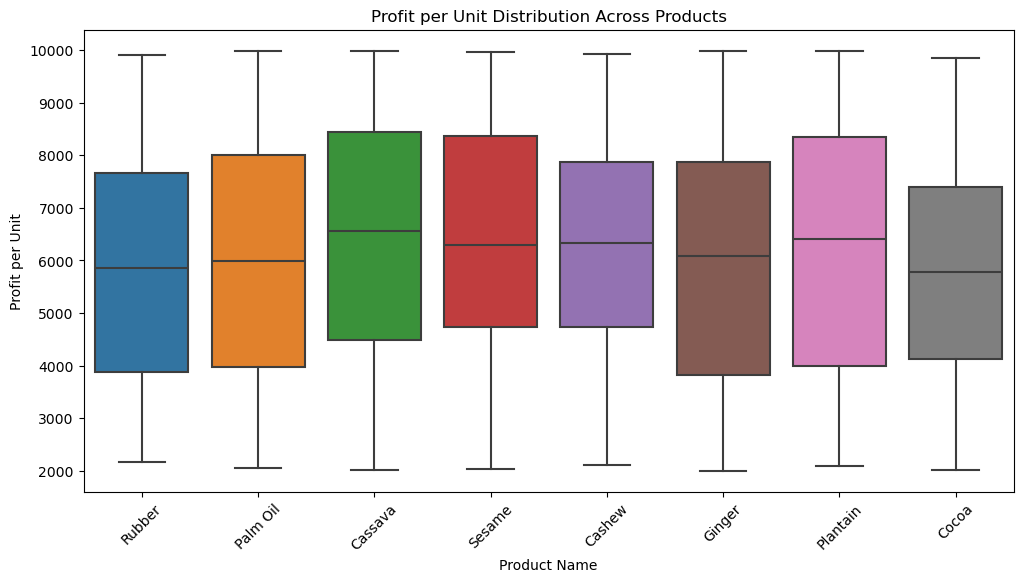

Summary Statistics for Profit per Unit Across Products:
              count         mean          std      min        25%       50%  \
Product Name                                                                  
Cashew        139.0  6350.190072  2153.226964  2110.33  4726.7450  6333.200   
Cassava       120.0  6451.818667  2249.007893  2017.08  4484.0875  6567.155   
Cocoa         136.0  5830.189559  2174.661888  2018.73  4123.0350  5776.105   
Ginger        101.0  5966.108614  2373.800410  2000.30  3828.5900  6086.460   
Palm Oil      124.0  6052.441774  2321.432617  2057.84  3967.9575  5985.735   
Plantain      122.0  6117.033033  2416.996210  2088.86  3986.1750  6413.130   
Rubber        125.0  5810.707600  2211.238349  2169.04  3869.8300  5863.920   
Sesame        133.0  6389.495338  2254.307624  2030.30  4729.7600  6300.280   

                    75%      max  
Product Name                      
Cashew        7876.2200  9931.61  
Cassava       8443.8425  9979.02  
Cocoa        

In [28]:
# Box plot to visualize profit per unit distribution across products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Name', y='Profit per unit', data=Nigerian_Exports)
plt.title('Profit per Unit Distribution Across Products')
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Profit per Unit')
plt.show()

# Summary statistics for profit per unit across products
profit_per_unit_stats = Nigerian_Exports.groupby('Product Name')['Profit per unit'].describe()
print("Summary Statistics for Profit per Unit Across Products:")
print(profit_per_unit_stats)

1. Product Performance in Terms of Profit Margin:
Cashew, Cassava, Ginger, and Sesame have relatively higher profit margins, ranging from approximately 25% to 28%. This indicates that these products yield a significant profit relative to their unit prices.
Cocoa, Palm Oil, Plantain, and Rubber have slightly lower profit margins, ranging from approximately 22% to 25%. While still profitable, these products may have higher production costs or face more competition in the market
.
2. Comparison of Company Performance Based on Units Sold and Profit Generated:
Agro Export Nigeria Ltd stands out in terms of both units sold and export value, indicating its strong market presence and high revenue generation.
Other companies such as Golden Farms Nigeria Limited, Nigeria Agro Export Company, and Prime Agro Exports Nigeria Limited also demonstrate significant performance in terms of units sold and export va
lue### .
3. Summary Statistics for Profit per Unit Across Prod
- ucts:
Mean Profit per Unit: The average profit per unit varies across products, ranging from approximately 5,800 to 6,500 Naira. This suggests differences in profitability among the different agricultural pro
- ducts.
Standard Deviation: The standard deviation reflects the dispersion of profit per unit values around the mean. Higher standard deviations indicate greater variability in profitability for certain pr
- oducts.
Minimum and Maximum Profit per Unit: These values represent the range of profitability observed for each product, indicating the potential for both high and low-profit 
#### margins.
Overall 
- Insights:
Some products, such as Cashew and Cassava, exhibit both high profit margins and relatively stable profitability, making them potentially lucrative for further i- nvestment.
Companies like Agro Export Nigeria Ltd demonstrate strong performance in terms of both sales volume and revenue generation, suggesting effective market strategies or product-  offerings.
Monitoring outliers or underperforming products/companies can help identify areas for improvement or strategic adjustments to enhance overall performance.

In [29]:
# Summary statistics for units sold
units_sold_stats = Nigerian_Exports['Units Sold'].describe()

# Calculate the interquartile range (IQR)
Q1 = units_sold_stats['25%']
Q3 = units_sold_stats['75%']
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (products with units sold outside the bounds)
outliers = Nigerian_Exports[(Nigerian_Exports['Units Sold'] < lower_bound) | (Nigerian_Exports['Units Sold'] > upper_bound)]

# Identify underperforming products (e.g., below the first quartile)
underperforming_products = Nigerian_Exports[Nigerian_Exports['Units Sold'] < Q1]

# Identify underperforming companies (e.g., companies with lower than average sales revenue)
avg_sales_revenue = Nigerian_Exports['Export Value'].mean()
underperforming_companies = Nigerian_Exports[Nigerian_Exports['Export Value'] < avg_sales_revenue]

# Print the results
print("Outliers (Products with Units Sold outside the bounds):")
print(outliers[['Product Name', 'Units Sold']])
print("\nUnderperforming Products (Units Sold below the first quartile):")
print(underperforming_products[['Product Name', 'Units Sold']])
print("\nUnderperforming Companies (Sales Revenue below the average):")
print(underperforming_companies[['Company', 'Export Value']])

Outliers (Products with Units Sold outside the bounds):
Empty DataFrame
Columns: [Product Name, Units Sold]
Index: []

Underperforming Products (Units Sold below the first quartile):
    Product Name  Units Sold
3         Rubber         191
6         Rubber         142
10        Rubber         192
12        Cashew         220
16        Rubber         250
..           ...         ...
982       Cashew         290
984       Cashew         208
990       Cashew         225
991       Ginger         218
998       Cashew         315

[250 rows x 2 columns]

Underperforming Companies (Sales Revenue below the average):
                                       Company  Export Value
2                     Farmgate Nigeria Limited   13012587.90
3     Nigerian Export Promotion Council (NEPC)    4198430.21
4                  Nigeria Agro Export Company    5004145.62
6                   Solid Agro Nigeria Limited    3121963.72
8                      Agro Export Nigeria Ltd   10845545.64
..               

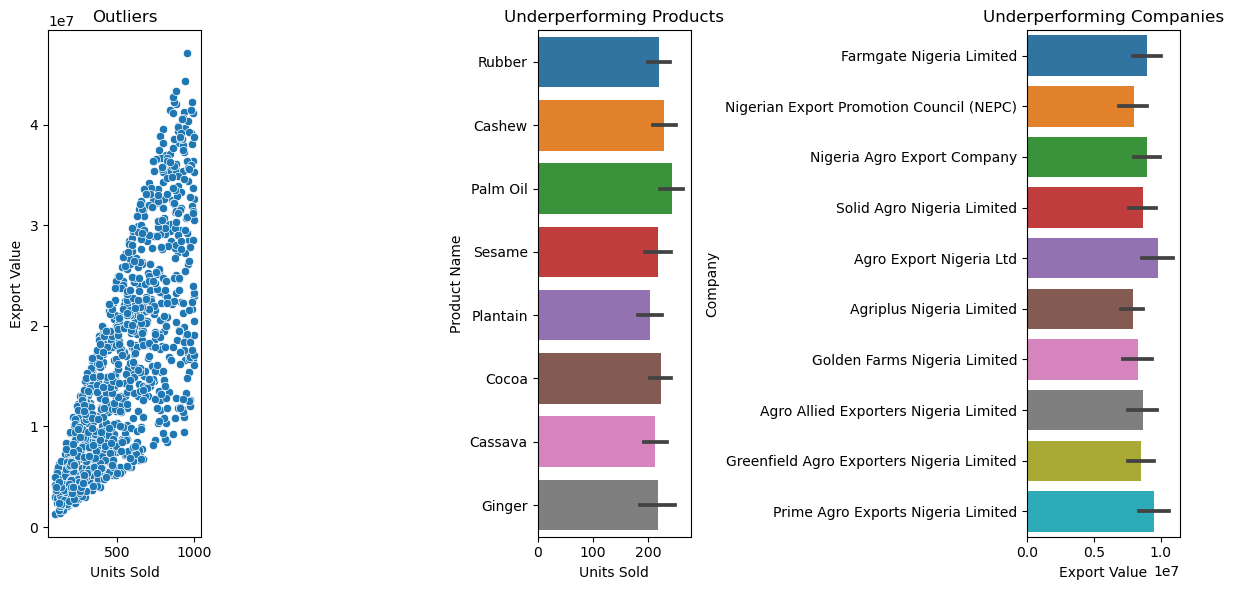

In [30]:
# Identify outliers (products with units sold outside the bounds)
outliers = Nigerian_Exports[(Nigerian_Exports['Units Sold'] < lower_bound) | (Nigerian_Exports['Units Sold'] > upper_bound)]

# Identify underperforming products (e.g., below the first quartile)
underperforming_products = Nigerian_Exports[Nigerian_Exports['Units Sold'] < Q1]

# Identify underperforming companies (e.g., companies with lower than average sales revenue)
avg_sales_revenue = Nigerian_Exports['Export Value'].mean()
underperforming_companies = Nigerian_Exports[Nigerian_Exports['Export Value'] < avg_sales_revenue]

# Create visualizations
plt.figure(figsize=(12, 6))

# Scatter plot for outliers
plt.subplot(1, 3, 1)
sns.scatterplot(x='Units Sold', y='Export Value', data=Nigerian_Exports)
sns.scatterplot(x='Units Sold', y='Export Value', data=outliers, color='red', label='Outliers')
plt.title('Outliers')
plt.xlabel('Units Sold')
plt.ylabel('Export Value')

# Bar chart for underperforming products
plt.subplot(1, 3, 2)
sns.barplot(x='Units Sold', y='Product Name', data=underperforming_products)
plt.title('Underperforming Products')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')

# Bar chart for underperforming companies
plt.subplot(1, 3, 3)
sns.barplot(x='Export Value', y='Company', data=underperforming_companies)
plt.title('Underperforming Companies')
plt.xlabel('Export Value')
plt.ylabel('Company')

plt.tight_layout()
plt.show()

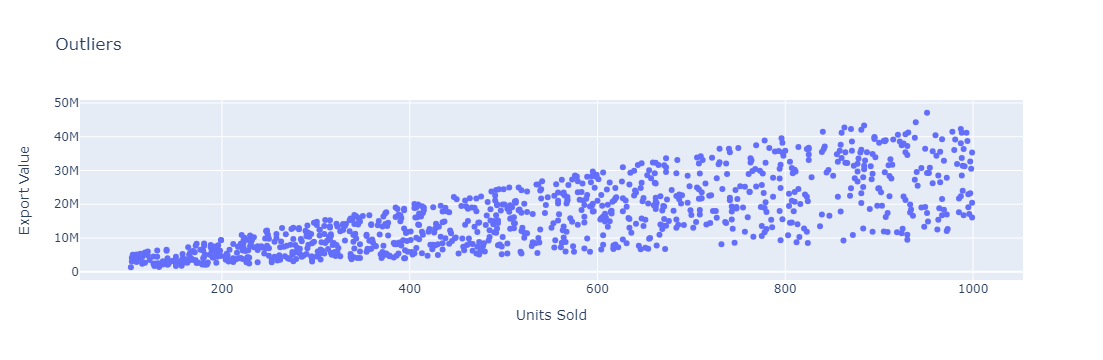

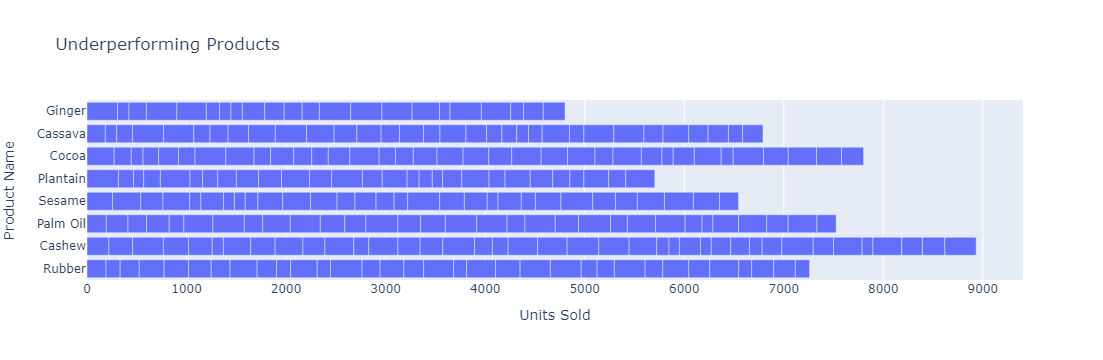

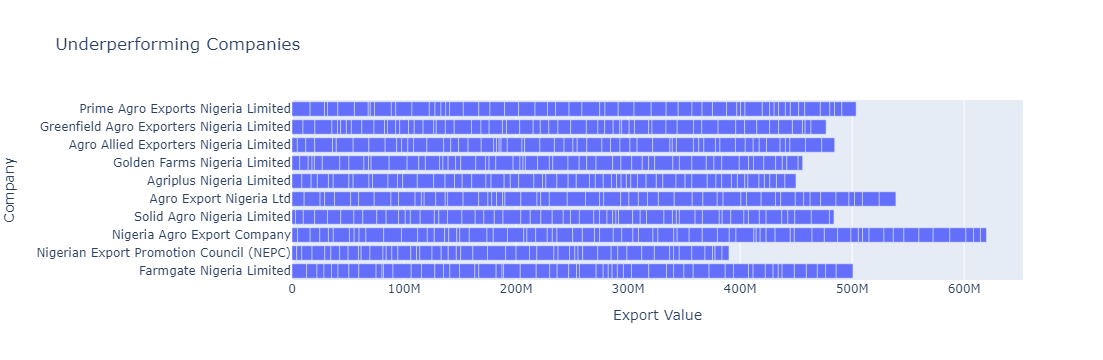

In [31]:
import plotly.graph_objects as go
import plotly.express as px

# Scatter plot for outliers
fig1 = px.scatter(Nigerian_Exports, x='Units Sold', y='Export Value', title='Outliers',
                  labels={'Units Sold': 'Units Sold', 'Export Value': 'Export Value'})
fig1.add_trace(go.Scatter(x=outliers['Units Sold'], y=outliers['Export Value'], mode='markers', 
                          marker=dict(color='red'), name='Outliers'))
fig1.show()

# Bar chart for underperforming products
fig2 = px.bar(underperforming_products, x='Units Sold', y='Product Name', orientation='h', title='Underperforming Products',
              labels={'Units Sold': 'Units Sold', 'Product Name': 'Product Name'})
fig2.show()

# Bar chart for underperforming companies
fig3 = px.bar(underperforming_companies, x='Export Value', y='Company', orientation='h', title='Underperforming Companies',
              labels={'Export Value': 'Export Value', 'Company': 'Company'})
fig3.show()

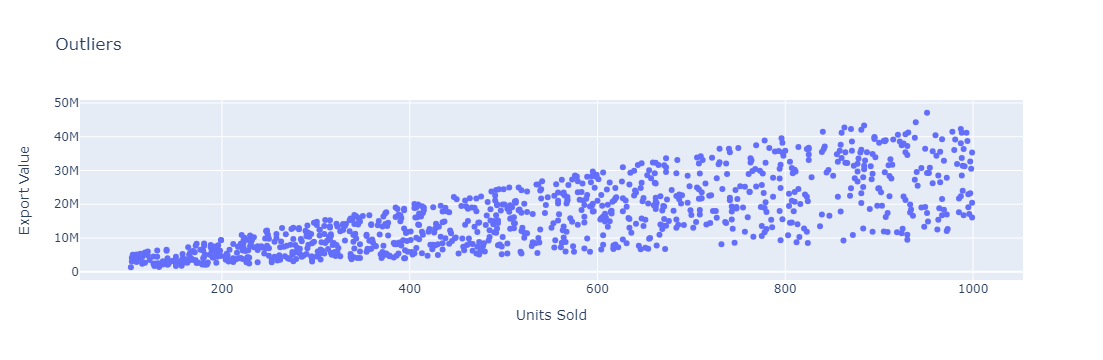

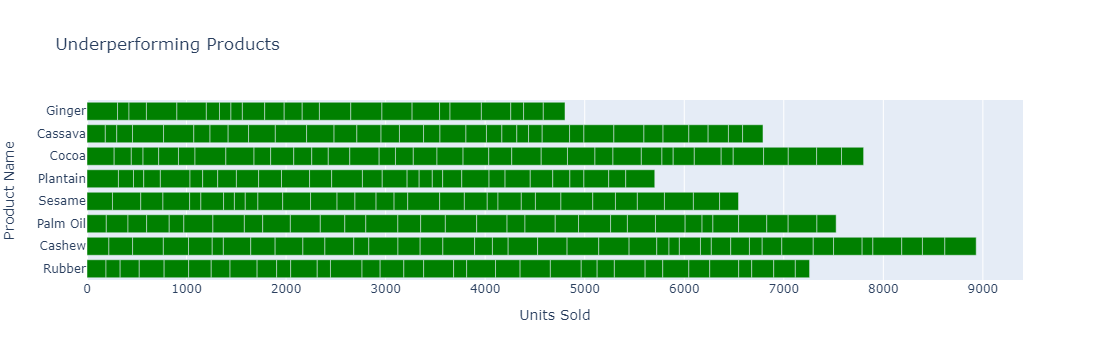

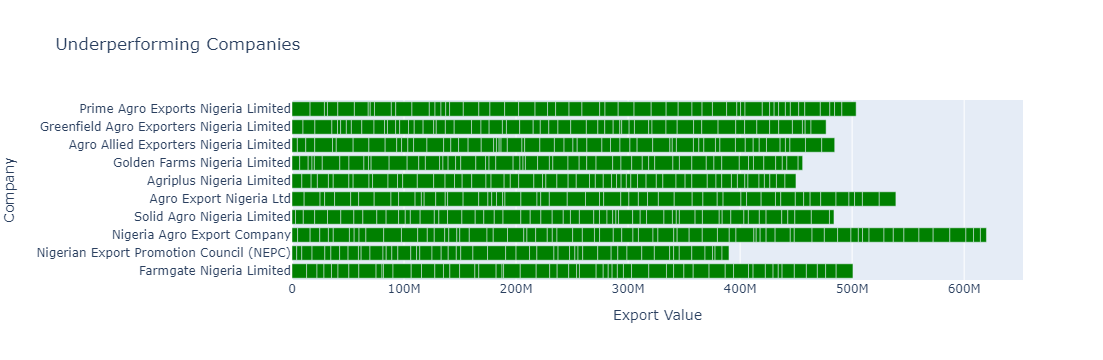

In [32]:
import plotly.graph_objects as go
import plotly.express as px

# Scatter plot for outliers
fig1 = px.scatter(Nigerian_Exports, x='Units Sold', y='Export Value', title='Outliers',
                  labels={'Units Sold': 'Units Sold', 'Export Value': 'Export Value'})
fig1.add_trace(go.Scatter(x=outliers['Units Sold'], y=outliers['Export Value'], mode='markers', 
                          marker=dict(color='red'), name='Outliers'))

# Bar chart for underperforming products
fig2 = px.bar(underperforming_products, x='Units Sold', y='Product Name', orientation='h', title='Underperforming Products',
              labels={'Units Sold': 'Units Sold', 'Product Name': 'Product Name'})
fig2.update_traces(marker_color='green')

# Bar chart for underperforming companies
fig3 = px.bar(underperforming_companies, x='Export Value', y='Company', orientation='h', title='Underperforming Companies',
              labels={'Export Value': 'Export Value', 'Company': 'Company'})
fig3.update_traces(marker_color='green')

fig1.show()
fig2.show()
fig3.show()
